In [12]:
import numpy as np
from load import load_data
from convert import convert
from pmc2 import *


In [13]:
#%matplotlib widget
%matplotlib inline
#%matplotlib qt
#%matplotlib gtk

import matplotlib.pyplot as plt
import matplotlib.font_manager

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

plt.rcParams.update({
    'pgf.rcfonts': False,
})

plt.rcParams['font.family'] = 'serif'

from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

# Input

- bpC : CT Compression data Break Point in p-q plane 
- bpE : CT Extension data Break Point in p-q plane

In [14]:
bpC = 400 #CT Compression data Break Point in p-q plane
bpE = 400 #CT Extension data Break Point in p-q plane 

In [15]:
data = load_data(7)
d = convert(data)
P1, P2 = create_P1_and_P2(data,bpC,bpE)

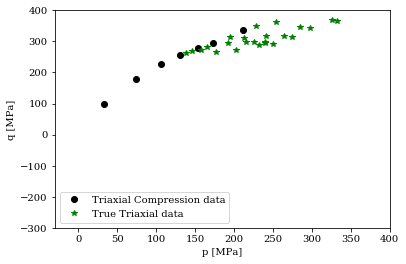

In [16]:
plt.plot(d['pC'],d['qC'],'ko',label ='Triaxial Compression data')

if d['pE'].size != 0:
    plt.plot(d['pE'],-1*d['qE'],'ko', label='Triaxial Extension data')
if d['po'].size != 0:
    plt.plot(d['po'],d['qo'],'g*', label='True Triaxial data')
plt.legend()

plt.xlabel('p [MPa]')
plt.ylabel('q [MPa]')
plt.xlim([-30, 400]);
plt.ylim([-300, 400]);
plt.savefig('t4.pdf')
plt.show()

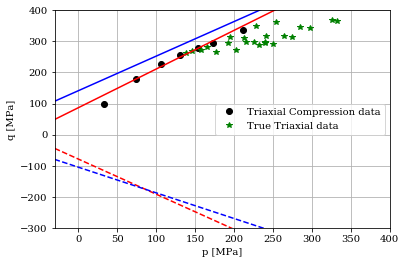

In [17]:
plt.clf()
plt.plot(d['pC'],d['qC'],'ko',label ='Triaxial Compression data')
if d['pE'].size != 0:
    plt.plot(d['pE'],-1*d['qE'],'ko', label='Triaxial Extension data')
if d['po'].size != 0:
    plt.plot(d['po'],d['qo'],'g*', label='True Triaxial data')
    
xfitP2 = np.linspace(-30,300) ;
xfitP1 = np.linspace(-40,400) ;

plt.plot(xfitP2,qCfit(P2,xfitP2),'r') ;
plt.plot(xfitP2,qEfit(P2,xfitP2),'--r') ;
plt.plot(xfitP1,qCfit(P1,xfitP1),'b') ;
plt.plot(xfitP1,qEfit(P1,xfitP1),'--b') ;

plt.xlim([-30, 400]);
plt.ylim([-300, 400]);
plt.grid()
plt.xlabel('p [MPa]')
plt.ylabel('q [MPa]')

plt.legend()

plt.savefig('t44.pgf')
#plt.savefig('t44.pdf')
plt.show()

In [18]:
x = np.linspace(0,max(d['sig2'])+100)
y = np.linspace(0,max(d['sig1'])+100)

In [19]:
def yc(P,x):
    return (P.Vo/P.Nc)+((P.Nc+1)/P.Nc)*x

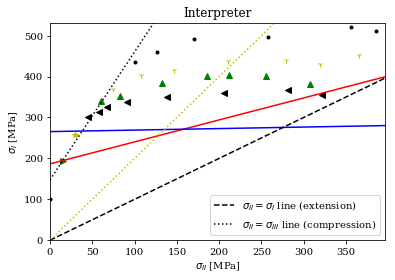

In [20]:
plt.clf()

markers = ['.','>','*','<','^','1']
colors = ['k','g','y',]
for (s1,s2,s3) in zip(d['sig1'],d['sig2'],d['sig3']):
    mark_idx = np.where(d['conf']==s3)[0][0]%len(markers)
    plt.plot(s2,s1,marker=markers[mark_idx],color=colors[mark_idx%len(colors)])

plt.plot(x,sig1(P2,x,d['conf'][1]),'r')
plt.plot(x,sig1(P1,x,d['conf'][1]),'b')
plt.plot(x,x,'--k',label='$\sigma_{II}=\sigma_{I}$ line (extension)')
plt.plot(x,yc(P2,x),'k:', label='$\sigma_{II}=\sigma_{III}$ line (compression)')
plt.plot(x,2*x,'y:')
plt.legend()

plt.xlim([0, max(d['sig2'])+10]);
plt.ylim([0, max(d['sig1'])+10]);
plt.xlabel('$\sigma_{II}$ [MPa]')
plt.ylabel('$\sigma_I$ [MPa]')
plt.title('Interpreter')
plt.show()